In [2]:
%pip install --quiet --upgrade diffusers transformers accelerate mediapy peft

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 106.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.2 MB/s eta 0:00:00


In [3]:
import mediapy as media
import random
import sys
import torch

from diffusers import SanaSprintPipeline

# NB: the largest model size ("1.6B") does not fit into memory on Google Colab.
model_size = "0.6B"

MAX_IMAGE_SIZE = 1024
model_id = f"Efficient-Large-Model/Sana_Sprint_{model_size}_{MAX_IMAGE_SIZE}px_diffusers"
dtype = torch.bfloat16
device = "cuda"

pipe = SanaSprintPipeline.from_pretrained(
    model_id,
    torch_dtype=dtype,
).to(device)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/890 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

text_encoder/model-00001-of-00002.safete(…):   0%|          | 0.00/4.99G [00:00<?, ?B/s]

tokenizer/tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

text_encoder/model-00002-of-00002.safete(…):   0%|          | 0.00/241M [00:00<?, ?B/s]

tokenizer/tokenizer.json:   0%|          | 0.00/34.4M [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/648 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

transformer/diffusion_pytorch_model.safe(…):   0%|          | 0.00/1.19G [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.25G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Prompt:	forest
Seed:	1328791855843446934


""

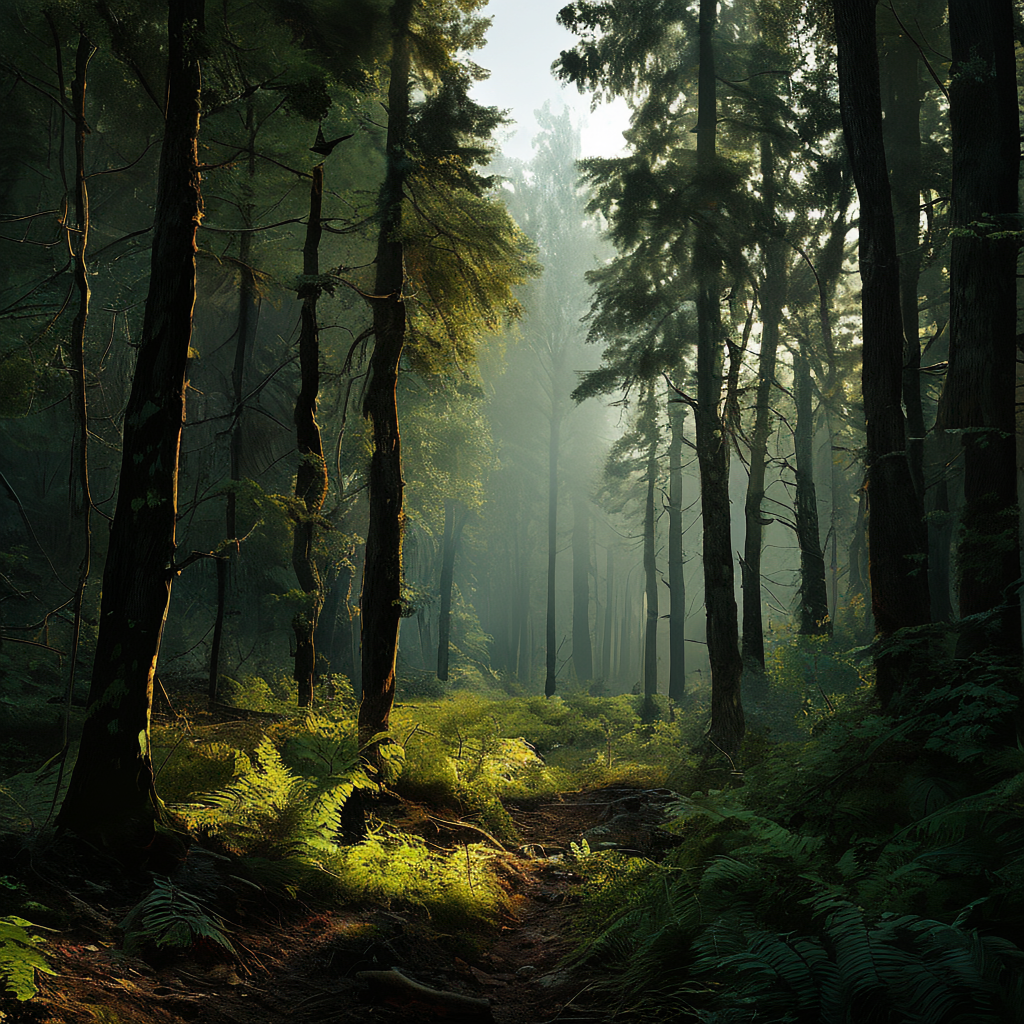

In [4]:
import random
import sys
import torch

prompt = ("forest")
seed = random.randint(0, sys.maxsize)

# Pick a value between 1 and 50:
num_inference_steps = 12

# Pick a value between 1.0 and 15.0:
guidance_scale = 5.0

# Pick a value between 256 and MAX_IMAGE_SIZE:
width = MAX_IMAGE_SIZE

# Pick a value between 256 and MAX_IMAGE_SIZE:
height = MAX_IMAGE_SIZE

images = pipe(
    prompt = prompt,
    num_inference_steps = num_inference_steps,
    intermediate_timesteps = None, # this line is required if num_inference_steps != 2
    guidance_scale = guidance_scale,
    width = width,
    height = height,
    generator = torch.Generator(device).manual_seed(seed),
    output_type = "pil",
    ).images

print(f"Prompt:\t{prompt}\nSeed:\t{seed}")
media.show_images(images)
images[0].save("output.jpg")